# Audio and OS Exploration

First attempt at pulling audio into Python, making spectrograms, navigating file structure via os module.

In [259]:
import komod
import numpy as np
# from presets import Preset
# import librosa as _librosa
import librosa
from librosa import display
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
import os
import re

%matplotlib inline

### Loading a File

...seems to be straightforward.

In [88]:
y, sr = librosa.load('../audio/sax_solo/ss0001.wav', sr=44100)

In [149]:
cmap = librosa.display.cmap(y, cmap_seq='gray_r')

In [150]:
cmap

In [90]:
y.shape[0]/5

44100.0

### Spectrogram Generation

In [253]:
def make_spectro(fname, 
                 sample_rate=22050, 
                 n_fft=1024,
                 hl=256, 
                 n_mels=512,
                 cmap='magma',
                 show=True, 
                 save=False):
    """
    The beginnings of a grand function for making and storing 
    a spectrogram for each file using librosa.
    """
    
    fpath = "../audio/" + fname + ".wav"
    y, sr = librosa.load(fpath,
                         sr=sample_rate,
                         duration=5.0,
                        )
    
    # make the spectrogram on mel scale
    M = librosa.feature.melspectrogram(y=y,
                                       sr=sample_rate,
                                       hop_length=hl, 
                                       n_mels=n_mels)
    
    if show:
        # creates figure of same aspect ratio as original
        w, h = figaspect(M)
        fig = plt.figure(figsize=(w,h), dpi=108)
        
        # these next two create a subplot with no margins
        ax = plt.subplot(111)
        plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        
        librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                                 sr=sample_rate,
                                 hop_length=hl,
                                 y_axis='mel', # mel, log, fft
                                 x_axis='time', # time
                                 cmap=cmap
                                );
  
    if show and save:
        img_fpath = "../specs/" + fname + ".png"
        plt.savefig(img_fpath, dpi=fig.dpi)
    
    return M

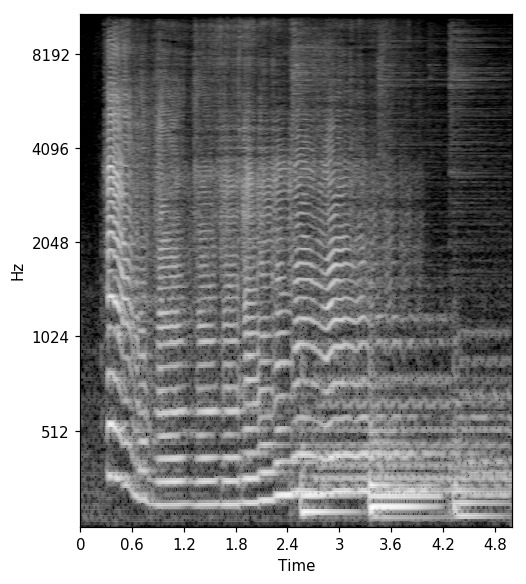

In [258]:
spec1 = make_spectro('sax_solo/ss0001', cmap='gray')

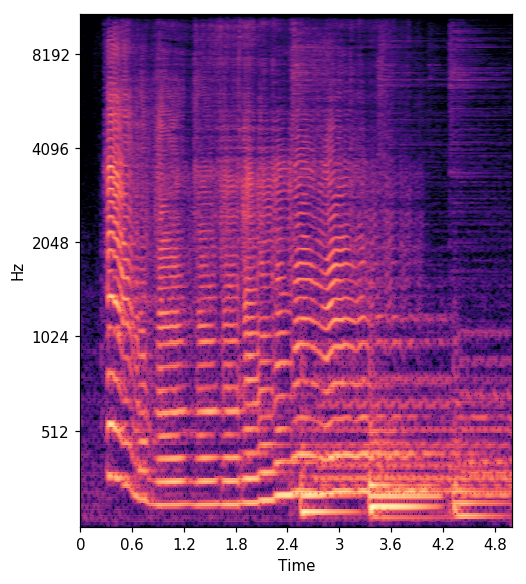

In [256]:
spec1 = make_spectro('sax_solo/ss0001')

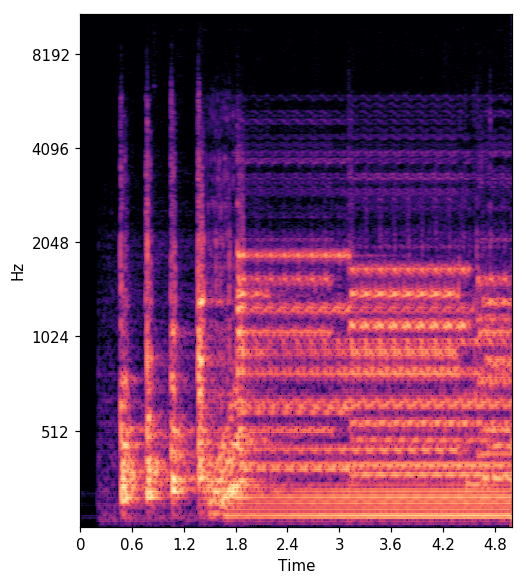

In [257]:
spec2 = make_spectro('no_sax/ns0001')

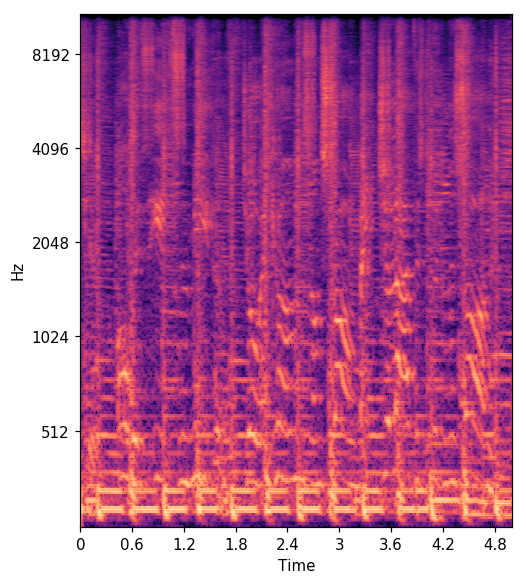

In [254]:
spec3 = make_spectro('no_sax/ns0500')

### Make Plot of Waveform

Can't see using this, but might as well know how to do it.

In [ ]:
y, sr = librosa.load('../audio/sax_solo/ss0001.wav', sr=44100)

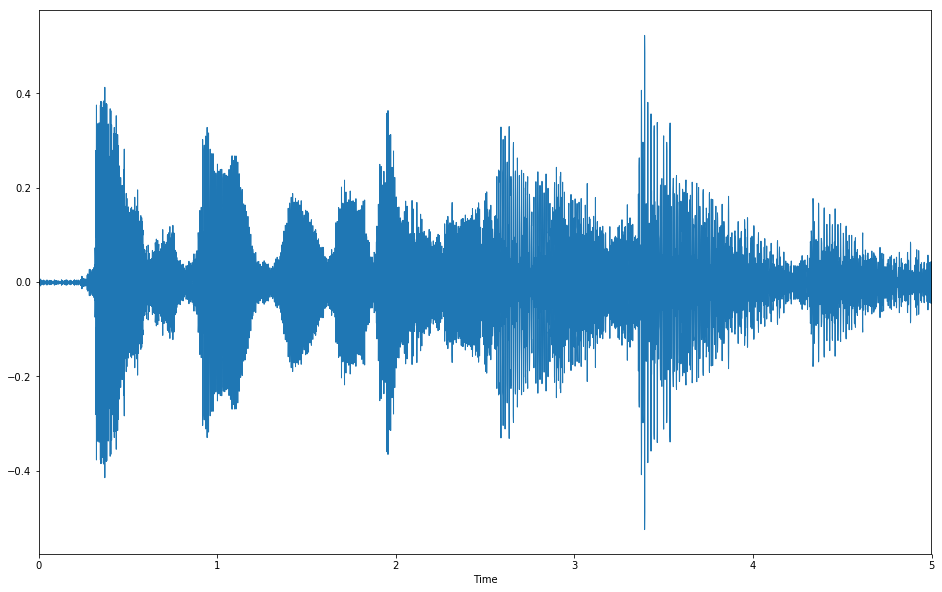

In [28]:
plt.figure(figsize=(16,10))
librosa.display.waveplot(y, sr=44100)

### Reading and Editing Multiple Files from OS

In [184]:
files = [f for f in os.listdir('../audio/sax_solo/')]

In [186]:
print(files)

['ss0001.wav', 'ss0002.wav', 'ss0003.wav', 'ss0004.wav', 'ss0005.wav', 'ss0006.wav', 'ss0007.wav', 'ss0008.wav', 'ss0009.wav', 'ss0010.wav', 'ss0011.wav']


In [189]:
files = os.listdir('../audio')

In [190]:
files

['.DS_Store', 'dump', 'no_sax', 'sax_sec', 'sax_solo']

In [224]:
def rename_files(regex_pattern, 
                 rename_code,
                 directory='dump'
                ):
    """
    For batch renaming of files that do not fit the estabilshed convention.
    ---
    IN
    regex_pattern: pattern used to match files needing edits (str)
    rename_code: code used to rename the file, assuming static edit (str)
    directory: sub-directory of '/audio' to scan through (str)
    NO OUT
    """
    
    root = '/Users/dluther/ds/metis/metisgh/projects/05-kojak/audio/' + directory
    p = re.compile(regex_pattern)
    edits = 0
#    for root, _, files in os.walk(root + directory):
    for file in os.listdir('../audio/' + directory):
        if p.match(file):
            print("Renaming", file)
            os.rename(root + '/' + file, root + '/' + eval(rename_code))
            edits += 1
    
    print("{} files renamed".format(edits))

In [225]:
rename_files(r"^\w{2}\d{3}.wav", "file[:2] + '0' + file[2:]")

Renaming ns500.wav
Renaming ns503.wav
2 files renamed


In [241]:
def dispatch_files(dispatch_dir='dump'):
    """
    Moves audio files from 'dump' directory to proper audio sub-folders.
    IN
    dispatch_dir: directory from which to start if not 'dump'
    NO OUT
    """
    
    root = '/Users/dluther/ds/metis/metisgh/projects/05-kojak/audio/'
    
    for file in os.listdir('../audio/' + dispatch_dir):
        fpath_current = root + dispatch_dir + '/' + file
        if not re.match(r'^\w{2}\d{4}.wav', file):
            print("No match:", file)
            continue
        if re.match('^ns', file):
            target = 'no_sax/'
        if re.match('^sc', file):
            target = 'sax_sec/'
        if re.match('^ss', file):
            target = 'sax_solo/'
        os.rename(fpath_current, root + target + file)

In [242]:
dispatch_files()

No match: .DS_Store
